# RFM Analysis

### Data Cleaning

In [72]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [73]:
# Read in the dataset
df = pd.read_csv(R"C:\Users\Admin\Desktop\DataScience 10alytics\Machine Learning\RFM-Based Customer Segmentation\Data\bank_data_C.csv")
df

TransactionID CustomerID CustomerDOB CustGender   CustLocation  \
0                  T1   C5841053     10/1/94          F     JAMSHEDPUR   
1                  T2   C2142763      4/4/57          M        JHAJJAR   
2                  T3   C4417068    26/11/96          F         MUMBAI   
3                  T4   C5342380     14/9/73          F         MUMBAI   
4                  T5   C9031234     24/3/88          F    NAVI MUMBAI   
...               ...        ...         ...        ...            ...   
1041609      T1048563   C8020229      8/4/90          M      NEW DELHI   
1041610      T1048564   C6459278     20/2/92          M         NASHIK   
1041611      T1048565   C6412354     18/5/89          M      HYDERABAD   
1041612      T1048566   C6420483     30/8/78          M  VISAKHAPATNAM   
1041613      T1048567   C8337524      5/3/84          M           PUNE   

         CustAccountBalance TransactionDate  TransactionTime  \
0                  17819.05          2/8/16           143207   
1                   2270.69          2/8/16           141858   
2                  17874.44          2/8/16           142712   
3                 866503.21          2/8/16           142714   
4                   6714.43          2/8/16           181156   
...                     ...             ...              ...   
1041609             7635.19         18/9/16           184824   
1041610            27311.42         18/9/16           183734   
1041611           221757.06         18/9/16           183313   
1041612            10117.87         18/9/16           184706   
1041613            75734.42         18/9/16           181222   

         TransactionAmount (INR)  
0                           25.0  
1                        27999.0  
2                          459.0  
3                         2060.0  
4                         1762.5  
...                          ...  
1041609                    799.0  
1041610                    460.0  
1041611                    770.0  
1041612                   1000.0  
1041613                   1166.0  

[1041614 rows x 9 columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


It is noted that there are no missing values in the data information displayed, however the date of birth and transaction date are not in the standard date time format 

<Axes: >

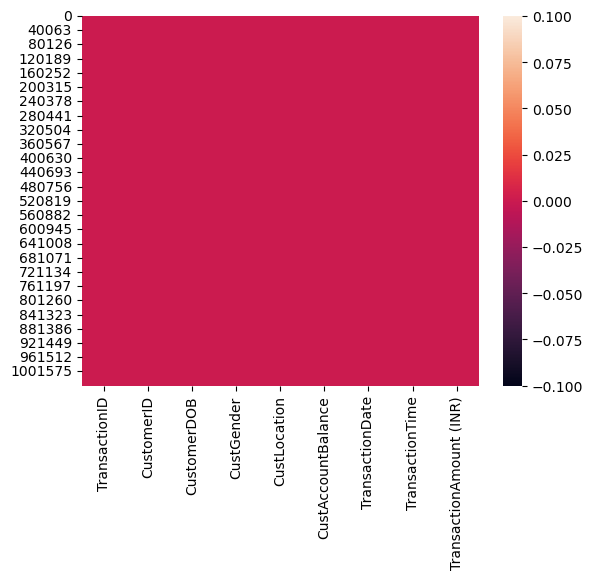

In [75]:
# Visualizing missing data to reconfirm my earlier position of no missing data
sns.heatmap(df.isnull())

In [76]:
# Confirming if there are duplicates
df.duplicated().sum()

0

In [77]:
df.describe(include = "all")

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
count        1041614    1041614     1041614    1041614      1041614   
unique       1041614     879358       17233          3         9275   
top               T1   C5533885    1/1/1800          M       MUMBAI   
freq               1          6       56292     760978       101997   
mean             NaN        NaN         NaN        NaN          NaN   
std              NaN        NaN         NaN        NaN          NaN   
min              NaN        NaN         NaN        NaN          NaN   
25%              NaN        NaN         NaN        NaN          NaN   
50%              NaN        NaN         NaN        NaN          NaN   
75%              NaN        NaN         NaN        NaN          NaN   
max              NaN        NaN         NaN        NaN          NaN   

        CustAccountBalance TransactionDate  TransactionTime  \
count         1.041614e+06         1041614     1.041614e+06   
unique                 NaN              55              NaN   
top                    NaN          7/8/16              NaN   
freq                   NaN           27084              NaN   
mean          1.149986e+05             NaN     1.571221e+05   
std           8.467609e+05             NaN     5.126352e+04   
min           0.000000e+00             NaN     0.000000e+00   
25%           4.728140e+03             NaN     1.240410e+05   
50%           1.676852e+04             NaN     1.642470e+05   
75%           5.742885e+04             NaN     2.000220e+05   
max           1.150355e+08             NaN     2.359590e+05   

        TransactionAmount (INR)  
count              1.041614e+06  
unique                      NaN  
top                         NaN  
freq                        NaN  
mean               1.566096e+03  
std                6.561464e+03  
min                0.000000e+00  
25%                1.600000e+02  
50%                4.575000e+02  
75%                1.200000e+03  
max                1.560035e+06

In [78]:
# Converting the date columns to date-time formats

df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2816\3651857122.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2816\3651857122.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [80]:
df.head(5)

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  2057-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  2073-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

Looking at the CustomerDOB, it is observed that some year of birth are wrong e.g 2057, 2073, etc, we'll need to take a look at cleaning the dob column

In [81]:
df["CustomerDOB"].unique()

<DatetimeArray>
['1994-10-01 00:00:00', '2057-04-04 00:00:00', '1996-11-26 00:00:00',
 '2073-09-14 00:00:00', '1988-03-24 00:00:00', '2072-08-10 00:00:00',
 '1992-01-26 00:00:00', '1982-01-27 00:00:00', '1988-04-19 00:00:00',
 '1984-06-22 00:00:00',
 ...
 '2057-10-13 00:00:00', '2044-07-30 00:00:00', '2005-08-15 00:00:00',
 '2046-06-04 00:00:00', '2050-07-01 00:00:00', '2015-11-18 00:00:00',
 '2045-06-28 00:00:00', '2065-07-18 00:00:00', '2042-05-15 00:00:00',
 '2044-10-24 00:00:00']
Length: 17233, dtype: datetime64[ns]

In [82]:
# Cleaning the DOB column by locating the columns with wrong DOBs and substracting 100years from it.

df.loc[df["CustomerDOB"].dt.year > 1999, "CustomerDOB"] = df["CustomerDOB"] - pd.DateOffset(years=100)

df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

<Axes: >

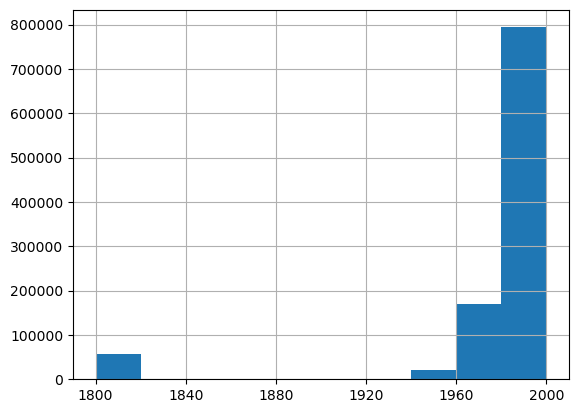

In [83]:
# Reviewing the DOB distribution

df["CustomerDOB"].hist()

It is noted that there are outliers in the DOB column with dates as 1800

In [84]:
df.loc[df["CustomerDOB"].dt.year < 1900, "CustomerDOB"]

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [85]:
# Calculating the mean of DOB excluding 1800

df.loc[df["CustomerDOB"].dt.year > 1800, "CustomerDOB"].mean()

Timestamp('1985-05-16 00:02:25.560537728')

In [86]:
# Replacing the outliers in date with the mean of the dates

# Defining the replacement timestamp
replacement_date = pd.Timestamp('1985-05-16 00:02:25.560537728')


# Replace dates in CustomerDOB with year 1800
df.loc[df["CustomerDOB"].dt.year == 1800, "CustomerDOB"] = replacement_date


<Axes: >

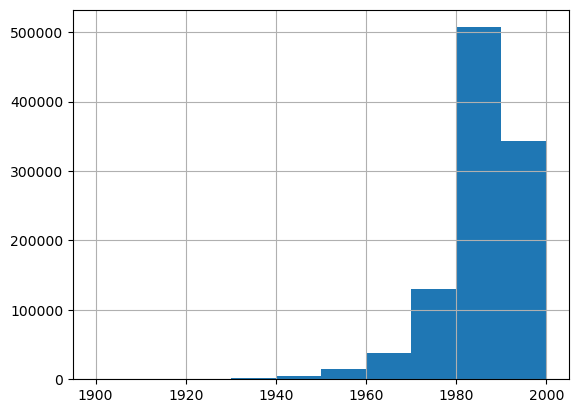

In [87]:
# Reconfirming the DOB distribution

df["CustomerDOB"].hist()

In [88]:
df["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [89]:
df["CustGender"] = df["CustGender"].replace('T', 'M')

In [90]:
df["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

<Axes: >

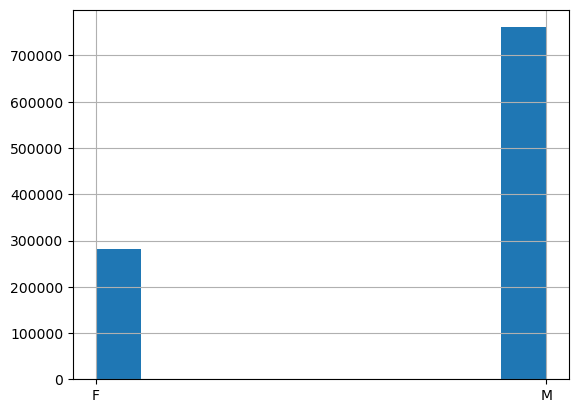

In [91]:
df["CustGender"].hist()

In [92]:
# Identifying the nos of rows where transaction amount is 0

df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [93]:
# dropping the rows with transaction amount of 0

df.drop(df[df["TransactionAmount (INR)"] == 0].index.tolist(), axis =0, inplace = True)

In [94]:
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

0

## Exploratory Data Analysis

#### Feature Engineering

In [95]:
# creating the age column

df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  Age  
0                     25.0   22  
1                  27999.0   59  
2                    459.0   20  
3                   2060.0   43  
4                   1762.5   28

In [96]:
df['CustomerID'].nunique()

878763

<Axes: >

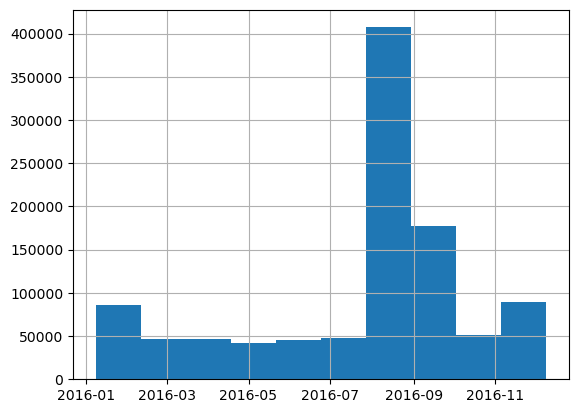

In [97]:
df['TransactionDate'].hist()

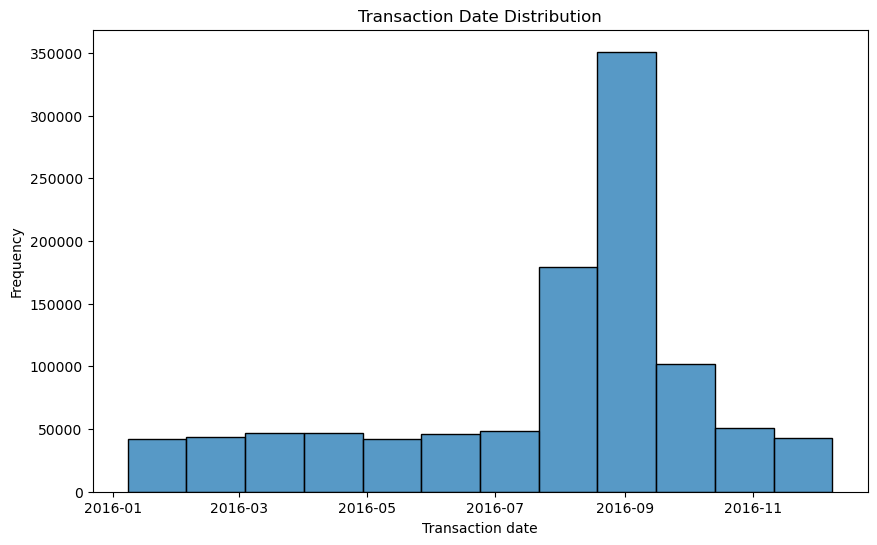

In [98]:
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionDate'], bins = 12, kde = False)
plt.xlabel('Transaction date')
plt.ylabel('Frequency')
plt.title('Transaction Date Distribution')
plt.show()

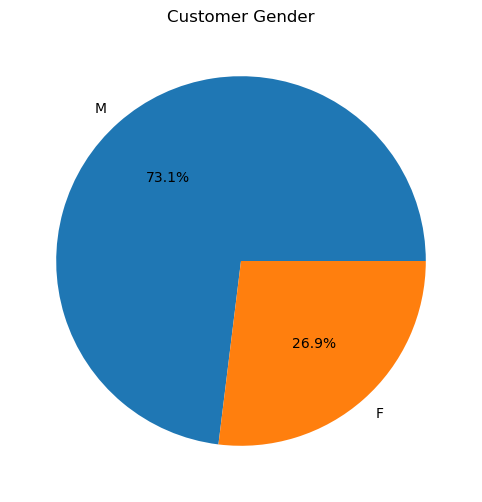

In [99]:
# Reviewing percentage of gender 

plt.figure(figsize=(10,6))
plt.pie(df['CustGender'].value_counts(), labels = df['CustGender'].value_counts().index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

In [100]:
df['CustomerID'].value_counts()

top_custlocation = df.groupby('CustLocation')['CustomerID'].nunique().sort_values(ascending= False)
top_custlocation.head(5)

CustLocation
MUMBAI       100123
NEW DELHI     82727
BANGALORE     80053
GURGAON       72566
DELHI         69535
Name: CustomerID, dtype: int64

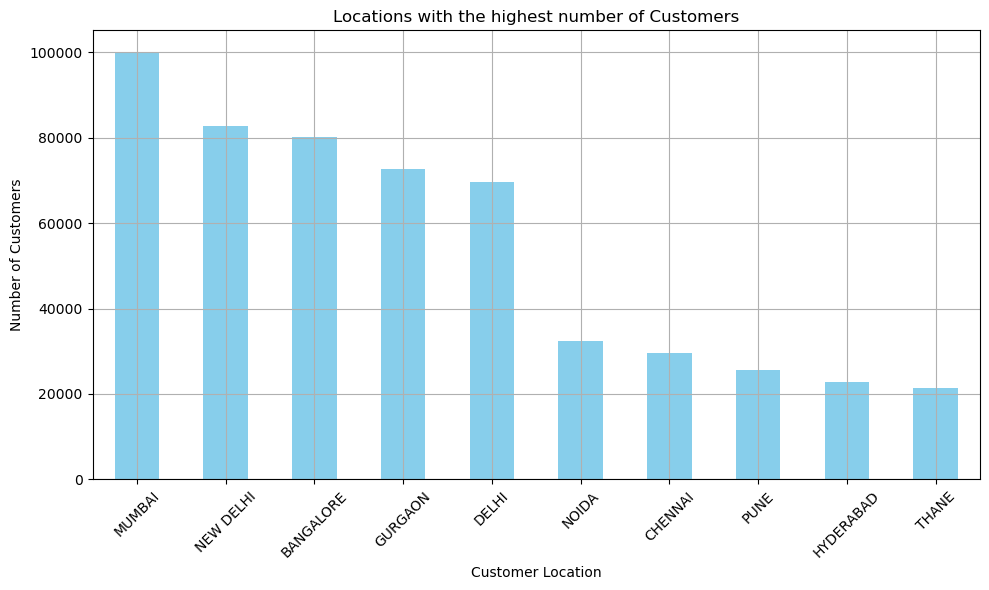

In [101]:
# Locations with the highest number of customers

plt.figure(figsize=(10,6))
top_custlocation.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Customer Location')
plt.ylabel('Number of Customers')
plt.title('Locations with the highest number of Customers')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [102]:
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
1            T2   C2142763  1957-04-04          M      JHAJJAR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
3            T4   C5342380  1973-09-14          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05      2016-02-08           143207   
1             2270.69      2016-02-08           141858   
2            17874.44      2016-02-08           142712   
3           866503.21      2016-02-08           142714   
4             6714.43      2016-02-08           181156   

   TransactionAmount (INR)  Age  
0                     25.0   22  
1                  27999.0   59  
2                    459.0   20  
3                   2060.0   43  
4                   1762.5   28

In [103]:
df['CustomerID'].value_counts()

CustomerID
C1736254    6
C6735477    6
C1026833    6
C7537344    6
C5531319    6
           ..
C3968743    1
C1034011    1
C2240412    1
C4332841    1
C6420483    1
Name: count, Length: 878763, dtype: int64

In [104]:
df['Month'] = df['TransactionDate'].dt.to_period('M')

In [105]:
df['Month']

0          2016-02
1          2016-02
2          2016-02
3          2016-02
4          2016-02
            ...   
1041609    2016-09
1041610    2016-09
1041611    2016-09
1041612    2016-09
1041613    2016-09
Name: Month, Length: 1040794, dtype: period[M]

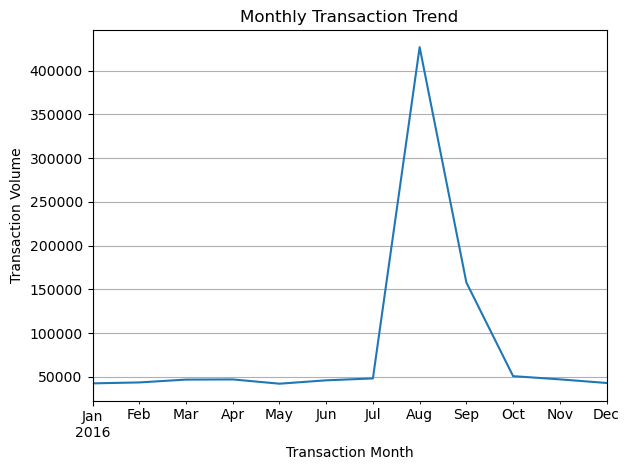

In [106]:
monthly_trend = df.groupby('Month').size()

monthly_trend.plot(kind='line')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Volume')
plt.title('Monthly Transaction Trend')
#plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Recency, Frequency and Monetary (RFM) Analysis

#### Recency

In [107]:
day = df['TransactionDate'].max()
day

Timestamp('2016-12-09 00:00:00')

In [108]:

days = df['TransactionDate'].min()
days

Timestamp('2016-01-08 00:00:00')

In [109]:
recency = df.groupby(['CustomerID']).agg({'TransactionDate': lambda x: ((day - x.max()).days) +1})
recency.head()

TransactionDate
CustomerID                 
C1010011                 75
C1010012                118
C1010014                155
C1010018                 86
C1010024                114

#### Frequency

In [110]:
frequency = df.drop_duplicates(subset = 'TransactionID').groupby(['CustomerID'])[['TransactionID']].count()
frequency.head(5)

TransactionID
CustomerID               
C1010011                2
C1010012                1
C1010014                2
C1010018                1
C1010024                1

#### Monetary

In [111]:
monetary = df.groupby('CustomerID')[['TransactionAmount (INR)']].sum()
monetary.head()

TransactionAmount (INR)
CustomerID                         
C1010011                     5106.0
C1010012                     1499.0
C1010014                     1455.0
C1010018                       30.0
C1010024                     5000.0

#### RFM Table

In [112]:
RFM_table = pd.concat([recency, frequency, monetary], axis = 1)
RFM_table

TransactionDate  TransactionID  TransactionAmount (INR)
CustomerID                                                         
C1010011                 75              2                   5106.0
C1010012                118              1                   1499.0
C1010014                155              2                   1455.0
C1010018                 86              1                     30.0
C1010024                114              1                   5000.0
...                     ...            ...                      ...
C9099836                155              1                    691.0
C9099877                 86              1                    222.0
C9099919                114              1                    126.0
C9099941                104              1                     50.0
C9099956                 76              1                    855.0

[878763 rows x 3 columns]

In [118]:
RFM_table = RFM_table.rename(columns = {'TransactionDate': 'recency', 'TransactionID': 'frequency', 'TransactionAmount (INR)': 'monetary'})

RFM_table.head()

recency  frequency  monetary
CustomerID                              
C1010011         75          2    5106.0
C1010012        118          1    1499.0
C1010014        155          2    1455.0
C1010018         86          1      30.0
C1010024        114          1    5000.0

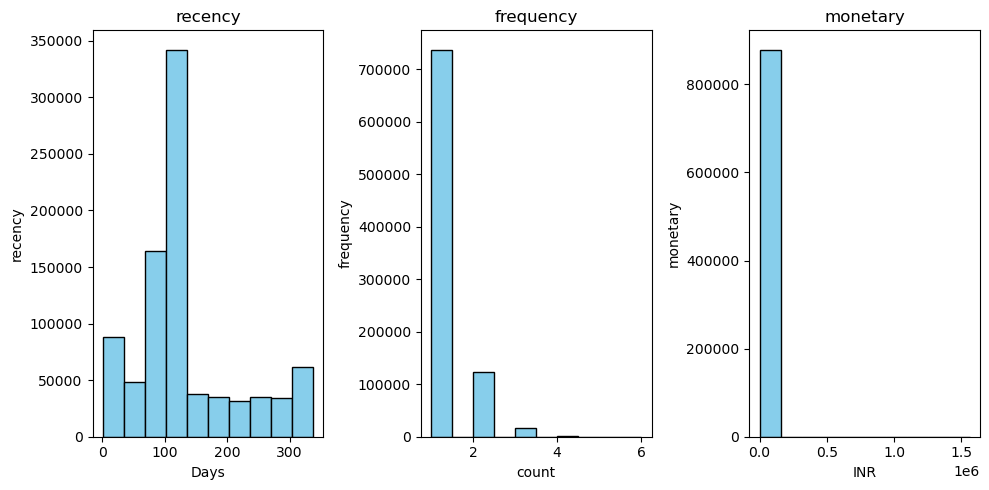

In [120]:
fig, axes = plt.subplots(1,3, figsize= (10,5))

columns = ["recency", 'frequency', 'monetary']

for i, col in enumerate (columns):
    axes[i].hist(RFM_table[col], bins = 10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Days' if col == 'recency' else 'count' if col == 'frequency' else 'INR')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

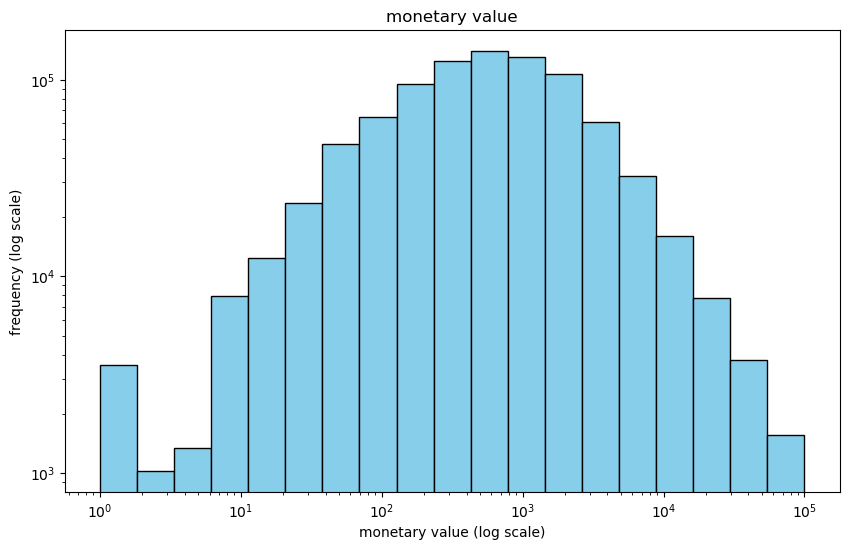

In [121]:
plt.figure(figsize=(10,6))
plt.hist(RFM_table['monetary'], bins = np.logspace(0,5,20), color='skyblue', edgecolor='black')
plt.title('monetary value')
plt.xlabel('monetary value (log scale)')
plt.ylabel('frequency (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [122]:
RFM_table.corr()

recency  frequency  monetary
recency    1.000000  -0.207705 -0.018321
frequency -0.207705   1.000000  0.097491
monetary  -0.018321   0.097491  1.000000

#### RFM Score 

In [123]:
# Assign rfm quantile

quantile = RFM_table[['recency', 'frequency', 'monetary']].quantile(q = [0.25, 0.5, 0.75]).to_dict()
quantile

{'recency': {0.25: 87.0, 0.5: 110.0, 0.75: 154.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [124]:
RFM_table['frequency'].value_counts()

frequency
1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: count, dtype: int64

In [125]:
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [126]:
def cust_frequeny_score(x):
    if x <= 3:
        return x
    else:
        return 4

In [128]:
RFM_table['R_score'] = RFM_table['recency'].apply(lambda x: assign_R_score(x, 'recency'))

RFM_table['M_score'] = RFM_table['monetary'].apply(lambda x: assign_M_score(x, 'monetary'))

RFM_table['F_score'] = RFM_table['frequency'].apply(cust_frequeny_score)

In [129]:
RFM_table

recency  frequency  monetary  R_score  M_score  F_score
CustomerID                                                         
C1010011         75          2    5106.0        4        4        2
C1010012        118          1    1499.0        2        3        1
C1010014        155          2    1455.0        1        3        2
C1010018         86          1      30.0        4        1        1
C1010024        114          1    5000.0        2        4        1
...             ...        ...       ...      ...      ...      ...
C9099836        155          1     691.0        1        3        1
C9099877         86          1     222.0        4        2        1
C9099919        114          1     126.0        2        1        1
C9099941        104          1      50.0        3        1        1
C9099956         76          1     855.0        4        3        1

[878763 rows x 6 columns]

In [130]:
RFM_table['Total_RFM_score'] = RFM_table[['R_score', 'M_score', 'F_score']].sum(axis=1)
RFM_table.head()

recency  frequency  monetary  R_score  M_score  F_score  \
CustomerID                                                            
C1010011         75          2    5106.0        4        4        2   
C1010012        118          1    1499.0        2        3        1   
C1010014        155          2    1455.0        1        3        2   
C1010018         86          1      30.0        4        1        1   
C1010024        114          1    5000.0        2        4        1   

            Total_RFM_score  
CustomerID                   
C1010011                 10  
C1010012                  6  
C1010014                  6  
C1010018                  6  
C1010024                  7

In [131]:
RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['M_score'].astype(str) + RFM_table['F_score'].astype(str)
RFM_table.head()

recency  frequency  monetary  R_score  M_score  F_score  \
CustomerID                                                            
C1010011         75          2    5106.0        4        4        2   
C1010012        118          1    1499.0        2        3        1   
C1010014        155          2    1455.0        1        3        2   
C1010018         86          1      30.0        4        1        1   
C1010024        114          1    5000.0        2        4        1   

            Total_RFM_score RFM_group  
CustomerID                             
C1010011                 10       442  
C1010012                  6       231  
C1010014                  6       132  
C1010018                  6       411  
C1010024                  7       241

<Axes: xlabel='Total_RFM_score', ylabel='count'>

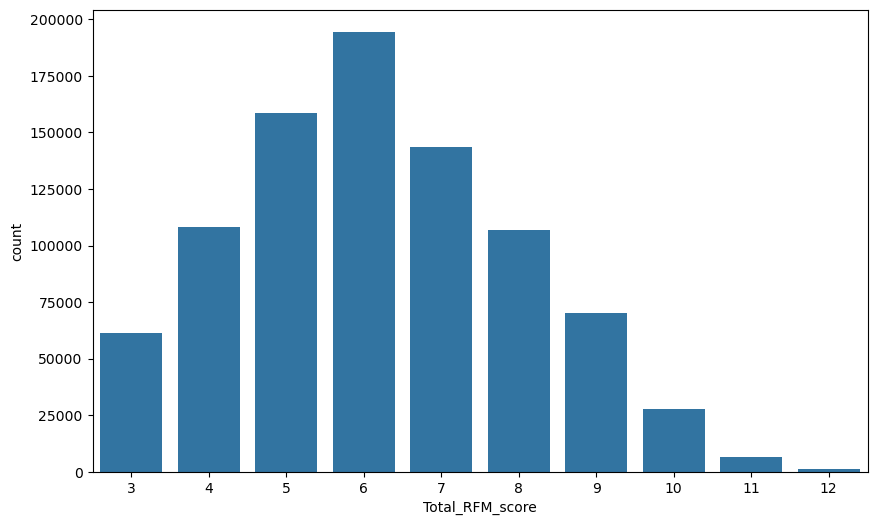

In [133]:
# Visualize the RFM score

plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['Total_RFM_score'])

**12-10** for high valued customers, **9-6** for medium valued customers, **5-3** for low valued customers

In [136]:
def assign_segments(x):
    if x <= 5:
        return 'low'
    elif x <= 9: 
        return 'medium'
    else:
        return 'high'

In [137]:
RFM_table['segments'] = RFM_table['Total_RFM_score'].apply(lambda x: assign_segments(x))
RFM_table.head()

recency  frequency  monetary  R_score  M_score  F_score  \
CustomerID                                                            
C1010011         75          2    5106.0        4        4        2   
C1010012        118          1    1499.0        2        3        1   
C1010014        155          2    1455.0        1        3        2   
C1010018         86          1      30.0        4        1        1   
C1010024        114          1    5000.0        2        4        1   

            Total_RFM_score RFM_group segments  
CustomerID                                      
C1010011                 10       442     high  
C1010012                  6       231   medium  
C1010014                  6       132   medium  
C1010018                  6       411   medium  
C1010024                  7       241   medium

<Axes: xlabel='segments', ylabel='count'>

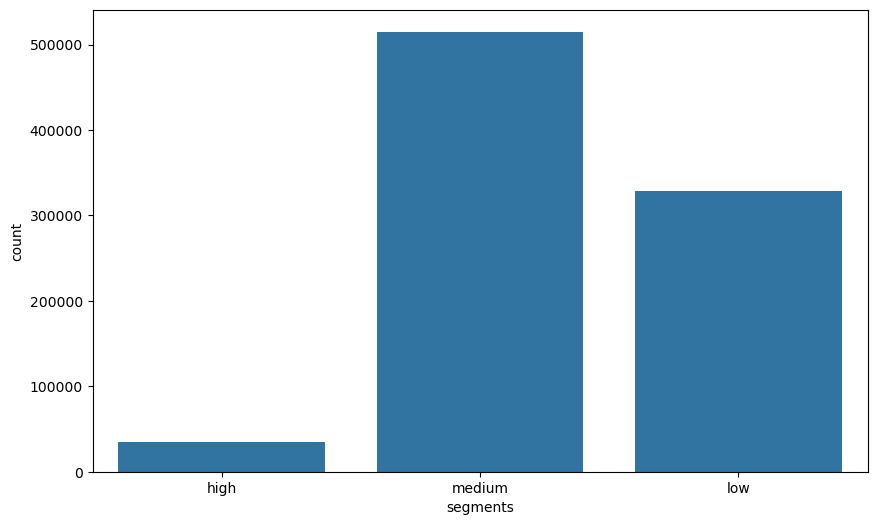

In [138]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['segments'])

#### Weighted RFM score

In [139]:
# Prioritizing recency

RFM_table['weighted_score'] = (RFM_table['R_score']*2) + (RFM_table['M_score']* 1) + (RFM_table['F_score']* 1)
RFM_table.head()

recency  frequency  monetary  R_score  M_score  F_score  \
CustomerID                                                            
C1010011         75          2    5106.0        4        4        2   
C1010012        118          1    1499.0        2        3        1   
C1010014        155          2    1455.0        1        3        2   
C1010018         86          1      30.0        4        1        1   
C1010024        114          1    5000.0        2        4        1   

            Total_RFM_score RFM_group segments  weighted_score  
CustomerID                                                      
C1010011                 10       442     high              14  
C1010012                  6       231   medium               8  
C1010014                  6       132   medium               7  
C1010018                  6       411   medium              10  
C1010024                  7       241   medium               9

<Axes: xlabel='weighted_score', ylabel='count'>

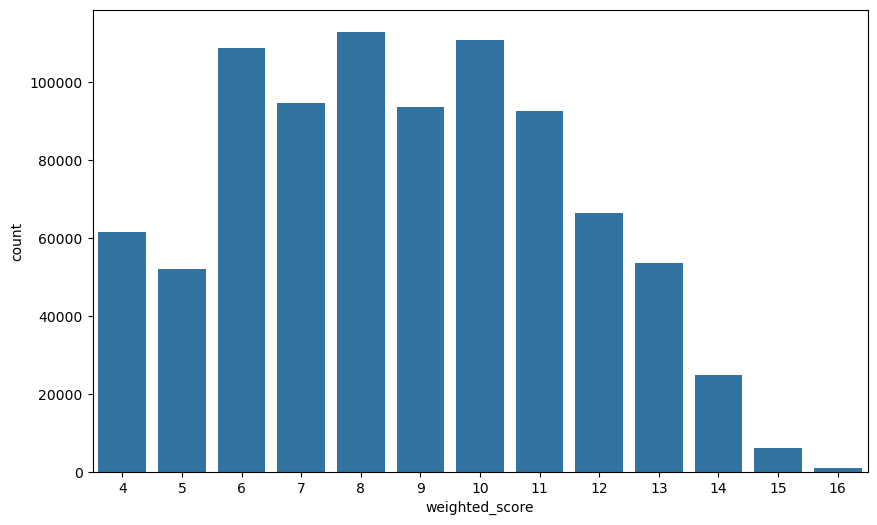

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['weighted_score'])

In [141]:
RFM_table['weighted_segments'] = RFM_table['weighted_score'].apply(lambda x: assign_segments(x))
RFM_table.head()

recency  frequency  monetary  R_score  M_score  F_score  \
CustomerID                                                            
C1010011         75          2    5106.0        4        4        2   
C1010012        118          1    1499.0        2        3        1   
C1010014        155          2    1455.0        1        3        2   
C1010018         86          1      30.0        4        1        1   
C1010024        114          1    5000.0        2        4        1   

            Total_RFM_score RFM_group segments  weighted_score  \
CustomerID                                                       
C1010011                 10       442     high              14   
C1010012                  6       231   medium               8   
C1010014                  6       132   medium               7   
C1010018                  6       411   medium              10   
C1010024                  7       241   medium               9   

           weighted_segments  
CustomerID                    
C1010011                high  
C1010012              medium  
C1010014              medium  
C1010018                high  
C1010024              medium

<Axes: xlabel='weighted_segments', ylabel='count'>

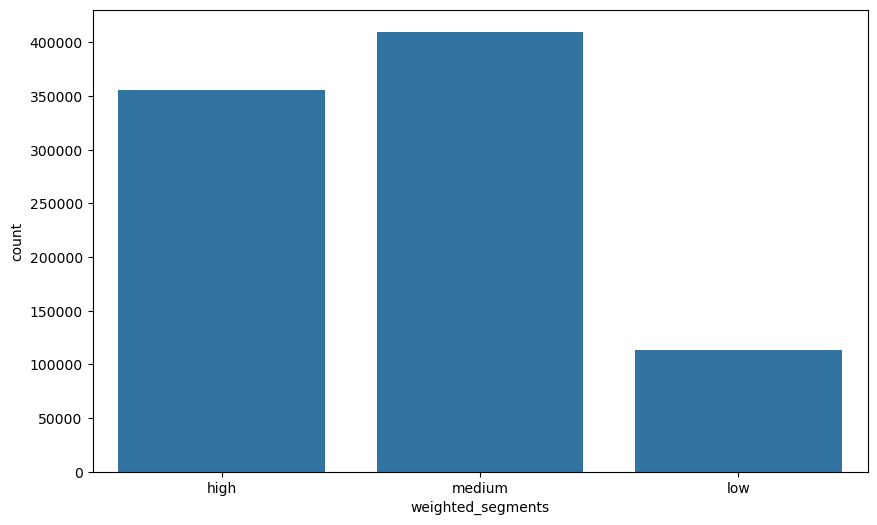

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['weighted_segments'])